In [1]:
"""
Template for week 4 project in Data Visualization

Solve the differential equations for Earth/Sun orbits using scipy
Plot the result orbits using matplotlib
"""

import math
import numpy as np

from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import animation

In [2]:
# Define some constants - units are in kilograms, kilometers, and days
GRAV_CON = 4.981 * 10 ** (-10) 
MASS_SUN = 1.989 * 10 ** 30
MASS_EARTH = 5.977 * 10 ** 24
INIT_EARTH = (1.495979 * 10 ** 8, 0, 0, 2.56721625 * 10 ** 6)
ORBITS = {}

# Resource paths
DATA_PATH = "data/"
PLOTS_PATH = "plots/"


In [3]:
#########################################################################
# Part 1 -  Solve the orbital equations and plot the resulting orbits


def orbital_eqs(e_0, t_0):
    """
    Input: Tuple e_0 of floats that represent Earth's position (p_x, p_y)
    and velocity (v_x, v_y) at time t_0
    
    Output: Tuple that contains approximation to d(e)/dt,
    computed from the orbital equations
    
    NOTE: The variable t_0 is not used in computing the
    returned value for the orbital equations
    """
    position_x, position_y, velocity_x, velocity_y = e_0
    distance = (position_x ** 2 + position_y ** 2) ** 0.5
    acceleration_x = -(GRAV_CON * MASS_SUN) / distance ** 3 * position_x
    acceleration_y = -(GRAV_CON * MASS_SUN) / distance ** 3 * position_y
    
    return (velocity_x, velocity_y, acceleration_x, acceleration_y)

In [4]:
def solve_orbital_eqs(time_steps, speed=1.0):
    """
    Input: numpy array time_steps, optional float speed
    that scales the Earth's initial velocity
    
    Output: Returns a 2D numpy array whose rows are the
    x and y position of the Earth's orbit at specified times
    """
    init = [INIT_EARTH[0], INIT_EARTH[1], INIT_EARTH[2] * speed, INIT_EARTH[3] * speed]
    sol = odeint(orbital_eqs, init, time_steps)
    
    return sol[:, :2].T

In [5]:
def test_solve_orbital_eqs():
    """ Test solve_orbital_eqs() """
    
    # Small test
    solve_orbital_eqs(np.linspace(0, 1, 3), 1.0)
    solve_orbital_eqs(np.linspace(0, 1, 11), 1.00)
    solve_orbital_eqs(np.linspace(0, 10, 101), 0.5)

    # Compute Earth/Sun orbits and save for later
    sim_steps = np.linspace(0, 1000, 1001)
    ORBITS["075"] = solve_orbital_eqs(sim_steps, 0.75)
    ORBITS["100"] = solve_orbital_eqs(sim_steps, 1.00)
    ORBITS["125"] = solve_orbital_eqs(sim_steps, 1.25)
    ORBITS["150"] = solve_orbital_eqs(sim_steps, 1.50)

test_solve_orbital_eqs()

In [6]:
def plot_earth_coords(orbit, time_steps, title="(p_x(t), p_y(t)) plots"):
    """
    Input: 
        - orbit: 2D numpy array where the first row contains x positions and 
                 the second row contains y positions for Earth's orbit.
        - time_steps: 1D numpy array representing time steps (in days).
        - title: Optional string for the plot title.

    Output:
        - Returns a matplotlib figure containing a plot of both x and y positions vs. time.
    """
    position_x = orbit[0, :] 
    position_y = orbit[1, :] 
    
    fig, axs = plt.subplots(figsize=(8, 5))
    
    axs.plot(time_steps, position_x, label="Px(t)", color="b", linestyle="-")
    axs.plot(time_steps, position_y, label="Py(t)", color="r", linestyle="-")
    
    axs.set_title(title, fontsize=14)
    axs.set_xlabel("Time (days)", fontsize=12)
    axs.set_ylabel("Coordinates (km)", fontsize=12)
    
    axs.legend(loc="upper right", fontsize=10)
    
    axs.xaxis.set_major_locator(plt.MaxNLocator(10))  
    axs.yaxis.set_major_locator(plt.MaxNLocator(10))  
    
    axs.grid(True, linestyle="--", alpha=0.6)
    
    return fig

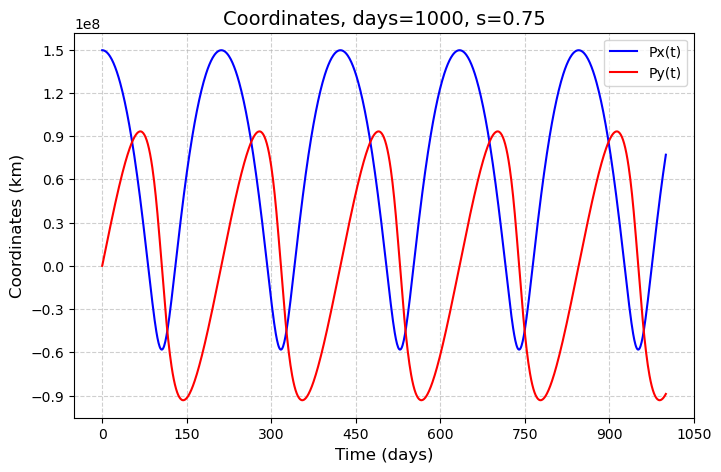

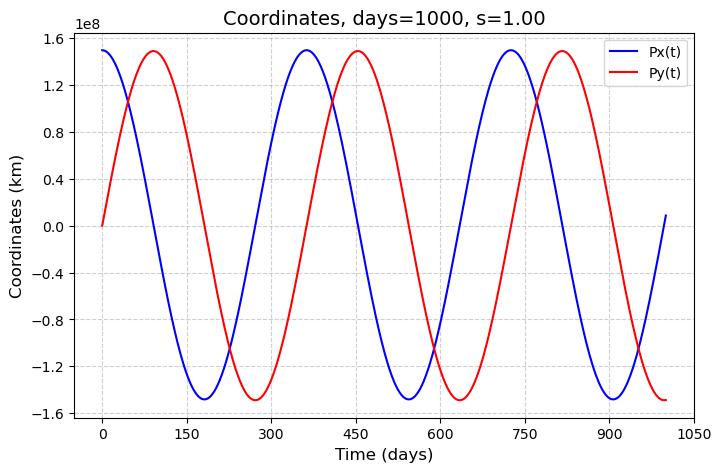

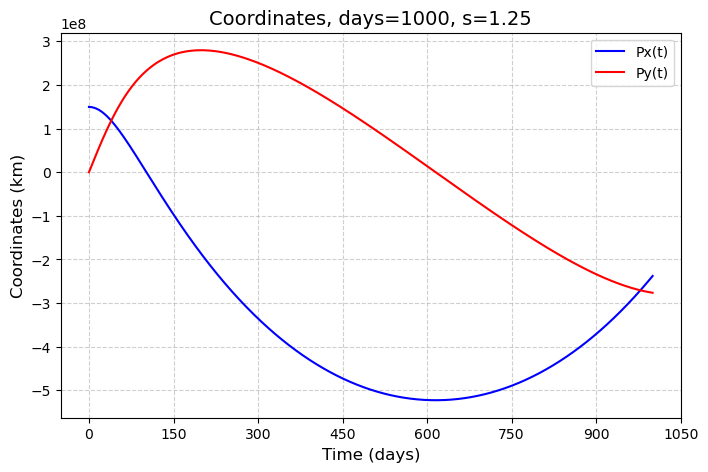

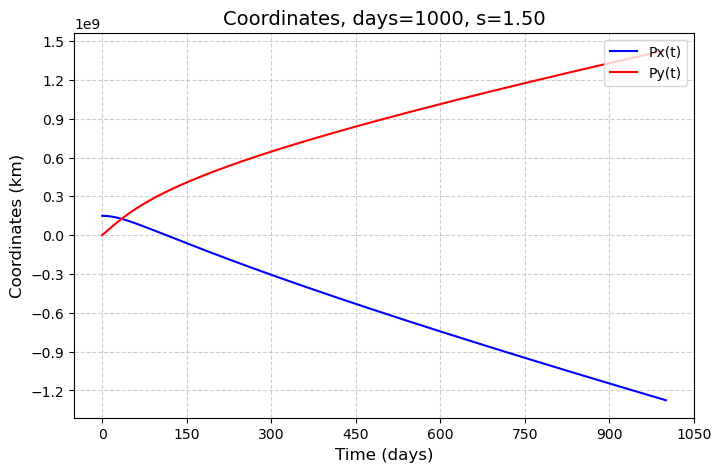

In [7]:
def test_plot_earth_coords():
    """ Test plot_earth_coords """
    
    sim_steps = np.linspace(0, 1000, 1001) 
    plot_earth_coords(ORBITS["075"], sim_steps, "Coordinates, days=1000, s=0.75")
    plot_earth_coords(ORBITS["100"], sim_steps, "Coordinates, days=1000, s=1.00")
    plot_earth_coords(ORBITS["125"], sim_steps, "Coordinates, days=1000, s=1.25")
    plot_earth_coords(ORBITS["150"], sim_steps, "Coordinates, days=1000, s=1.50")

test_plot_earth_coords()

In [8]:
def plot_earth_orbit(orbit, title="Plotted orbit"):
    """
    Input: Numpy array orbit whose rows are numpy arrays containing x and y positions
    for the Earth orbit
    
    Action: Plot x positions versus y positions using matplotlib
    """
    x_positions = orbit[0, :]
    y_positions = orbit[1, :]
    fig, axs = plt.subplots()
    axs.plot(x_positions, y_positions, label="Earth orbit", color="b")
    axs.set_aspect('equal', adjustable='box')
    axs.legend(loc="best")
    axs.set_xlabel("X Position (km)")
    axs.set_ylabel("Y Position (km)")
    axs.set_title(title)
    axs.grid(True, linestyle='--', alpha=0.7)
    axs.legend()
    
    return fig

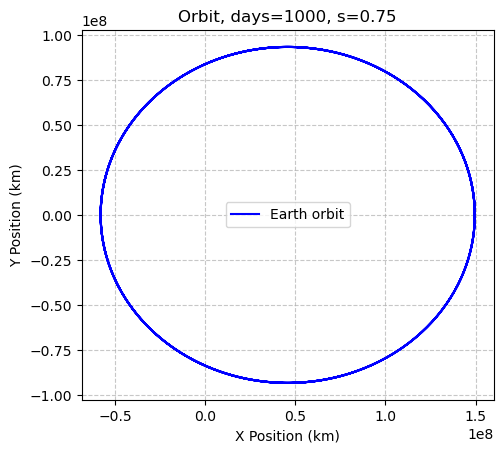

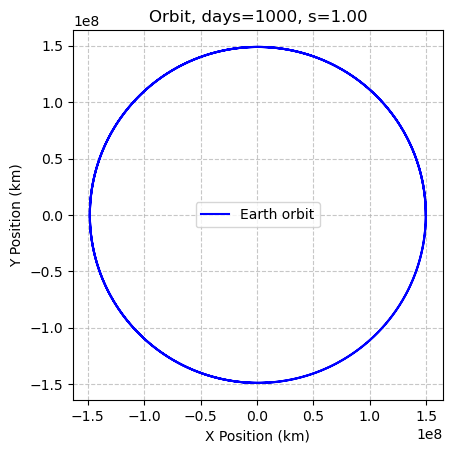

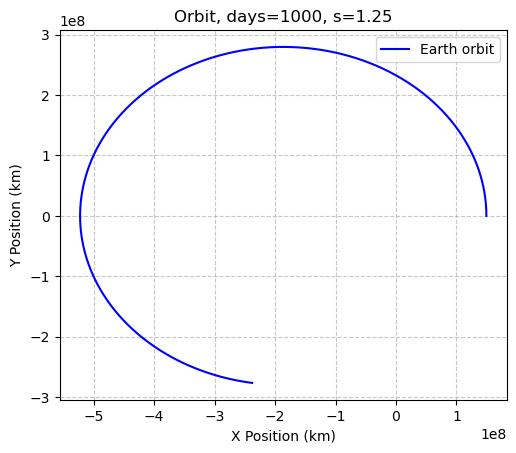

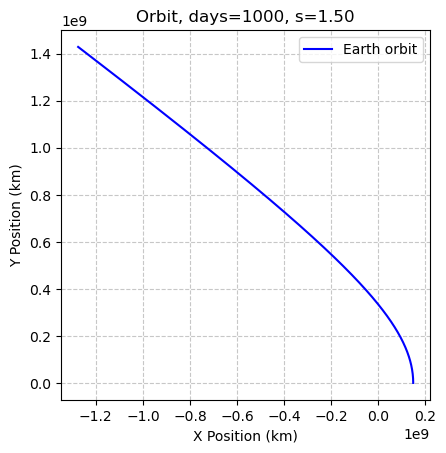

In [9]:
def test_plot_earth_orbit():
    """ Test plot_earth_orbit() """

    plot_earth_orbit(ORBITS["075"], "Orbit, days=1000, s=0.75")
    plot_earth_orbit(ORBITS["100"], "Orbit, days=1000, s=1.00")
    plot_earth_orbit(ORBITS["125"], "Orbit, days=1000, s=1.25")
    plot_earth_orbit(ORBITS["150"], "Orbit, days=1000, s=1.50")

test_plot_earth_orbit()
a=2

In [10]:
#########################################################################
# Part 2 - Animate the computed orbits


def extend_limits(limits, pad=0.1):
    """
    Input: Tuple limits = (min_x, max_x, min_y, max_y),
    float pad treated as a percentage

    Output: Tuple of four floats that represent new ranges
    extended by pad (as percentage of range length) in both directions
    """
    min_x, max_x, min_y, max_y = limits
    
    range_x = max_x - min_x
    range_y = max_y - min_y

    new_min_x = min_x - range_x * pad
    new_max_x = max_x + range_x * pad
    new_min_y = min_y - range_y * pad
    new_max_y = max_y + range_y * pad

    return (new_min_x, new_max_x, new_min_y, new_max_y)

In [30]:
def animate_earth_orbit(orbit, title="Animated orbit"):
    """
    Input: Numpy array orbit whose rows are numpy arrays containing x and y positions
    for the Earth orbit
    
    Output: matplotlib Animation object corresponding to
    plot of x positions versus y positions using matplotlib
    """
    x_positions = orbit[0, :]
    y_positions = orbit[1, :]
    limits = extend_limits((min(x_positions), max(x_positions), min(y_positions), max(y_positions)))
    fig, axs = plt.subplots()
    axs.set_xlim(limits[0], limits[1])
    axs.set_ylim(limits[2], limits[3])
    axs.set_title(title)
    axs.set_aspect('equal', adjustable='box')
    axs.grid(True, linestyle='--', alpha=0.7)
    axs.set_xlabel('Position x(km)')
    axs.set_ylabel('Position y(km)')
    #plot sun
    axs.plot(0, 0, 'yo', markersize=20, label="Sun")

    orbit_line, = axs.plot([], [], 'k-', lw=2, label="Earth orbit")
    earth_point, = axs.plot([], [], 'bo', markersize=8, label="Earth")

    def init():
        orbit_line.set_data([], [])
        earth_point.set_data([], [])
        return orbit_line, earth_point

    def animate(frame):
        orbit_line.set_data(np.asarray(x_positions[:frame]), np.asarray(y_positions[:frame]))
        earth_point.set_data(np.asarray(x_positions[frame]), np.asarray(y_positions[frame]))
        return orbit_line, earth_point

    frame_num = len(x_positions)
    anim = animation.FuncAnimation(fig, animate, init_func=init, 
                                   frames=frame_num, interval=10, blit=True)
    plt.legend(loc='upper right')
    # anim.save(title + '.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
    plt.show()
    

    return anim

In [34]:
import IPython

Creating animation for speed=0.75


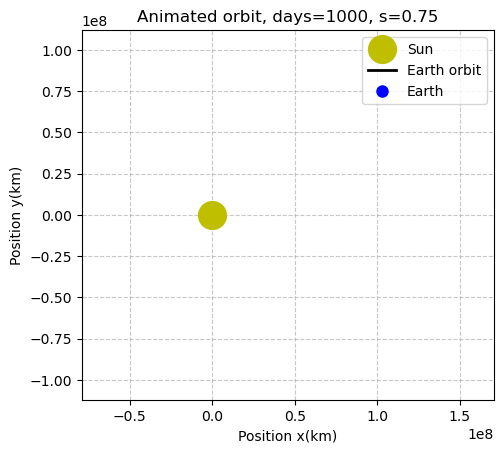

Creating animation for speed=1.00


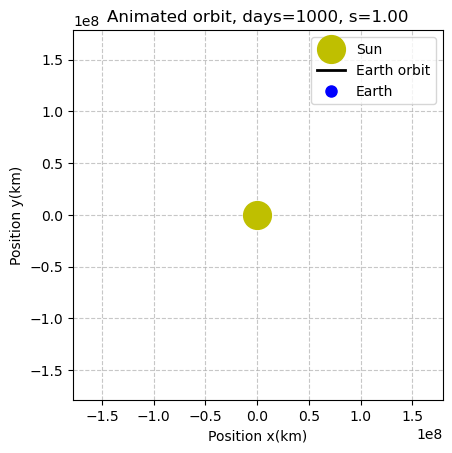

Creating animation for speed=1.25


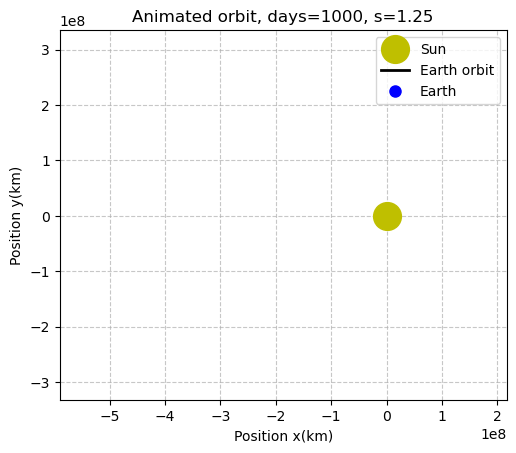

Creating animation for speed=1.50


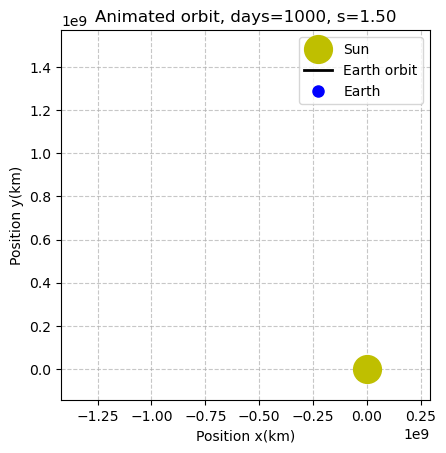

Done


In [36]:
def test_animate_earth_orbit():
    """ Test animate_earth_orbit() """
    
    print("Creating animation for speed=0.75")
    handle1 = animate_earth_orbit(ORBITS["075"], "Animated orbit, days=1000, s=0.75")
    
    print("Creating animation for speed=1.00")
    handle2 = animate_earth_orbit(ORBITS["100"], "Animated orbit, days=1000, s=1.00")
    
    print("Creating animation for speed=1.25")
    handle3 = animate_earth_orbit(ORBITS["125"], "Animated orbit, days=1000, s=1.25")
    
    print("Creating animation for speed=1.50")
    handle4 = animate_earth_orbit(ORBITS["150"], "Animated orbit, days=1000, s=1.50")
    print("Done")
        
    return handle1, handle2, handle3, handle4

#%matplotlib notebook
%matplotlib inline
# Save handles to animation objects so they are not garbage collected
HANDLES = test_animate_earth_orbit()

## Question 1##
**What are the geometric shapes of the various orbits computed by your simulations?**

### Answer
The actual orbital speed of the Earth corresponds to s = 1, meaning that the simulated orbit with s = 1.00 closely matches the real Earth’s orbit. Since Earth’s orbit around the Sun is an almost circular ellipse, the computed orbit in the simulation is also approximately a circle. **It is safe to say that the shape is a circle.**

## Question 2##
**What happened to the earth's trajectory when we increased its initial velocity by 50%?**

## Answer
When the Earth’s initial velocity was increased by 50% (s = 1.50), the trajectory changed significantly. Instead of following a nearly circular orbit, the Earth moved into a more elongated elliptical orbit. If the velocity increase were even higher, the Earth could potentially escape the Sun’s gravitational pull.